# EDA on model performance
*by Max*

In this notebook we'll look at the model performance and plot it for each of our models.

In [1]:
# set the directory of the data
# depending on colab or vscode environment
on_colabs = False
import sys
if on_colabs:
  from google.colab import drive
  drive.mount("/content/drive")
  DATA_DIR = "/content/drive/MyDrive/Radiant_Earth_Spot_Crop/data"
  PLOT_DIR = "/content/drive/MyDrive/Radiant_Earth_Spot_Crop/plots"
  sys.path.append("/content/drive/MyDrive/Radiant_Earth_Spot_Crop/src")
else:
  DATA_DIR = "../data"
  PLOT_DIR = "../plots"

  sys.path.append("../")

In [18]:
# import the needed modules
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import plotting modules and set the style
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(context="notebook", style="darkgrid", palette="crest", font="helvetica")
cmap = sns.color_palette("crest", 6) # six colors are created this way
sns.set(rc = {"figure.dpi":300})
sns.set(rc = {"figure.figsize":(6,3)})
sns.set(font_scale = 0.5)

In [15]:
model_f1 = {
    "model":["K-Nearest Neighbors", "K-Nearest Neighbors", "Extremely Randomized Tree", "Extremely Randomized Tree", "XGBClassifier", "XGBClassifier"],
    "data_typ":["training", "unseen", "training", "unseen", "training", "unseen"],
    "f1_score": [0.633, 0.418, 0.814, 0.594, 0.736, 0.614]
}
f1_data = pd.DataFrame(model_f1)
f1_data

,model,data_typ,f1_score
0,K-Nearest Neighbors,training,0.633
1,K-Nearest Neighbors,unseen,0.418
2,Extremely Randomized Tree,training,0.814
3,Extremely Randomized Tree,unseen,0.594
4,XGBClassifier,training,0.736
5,XGBClassifier,unseen,0.614


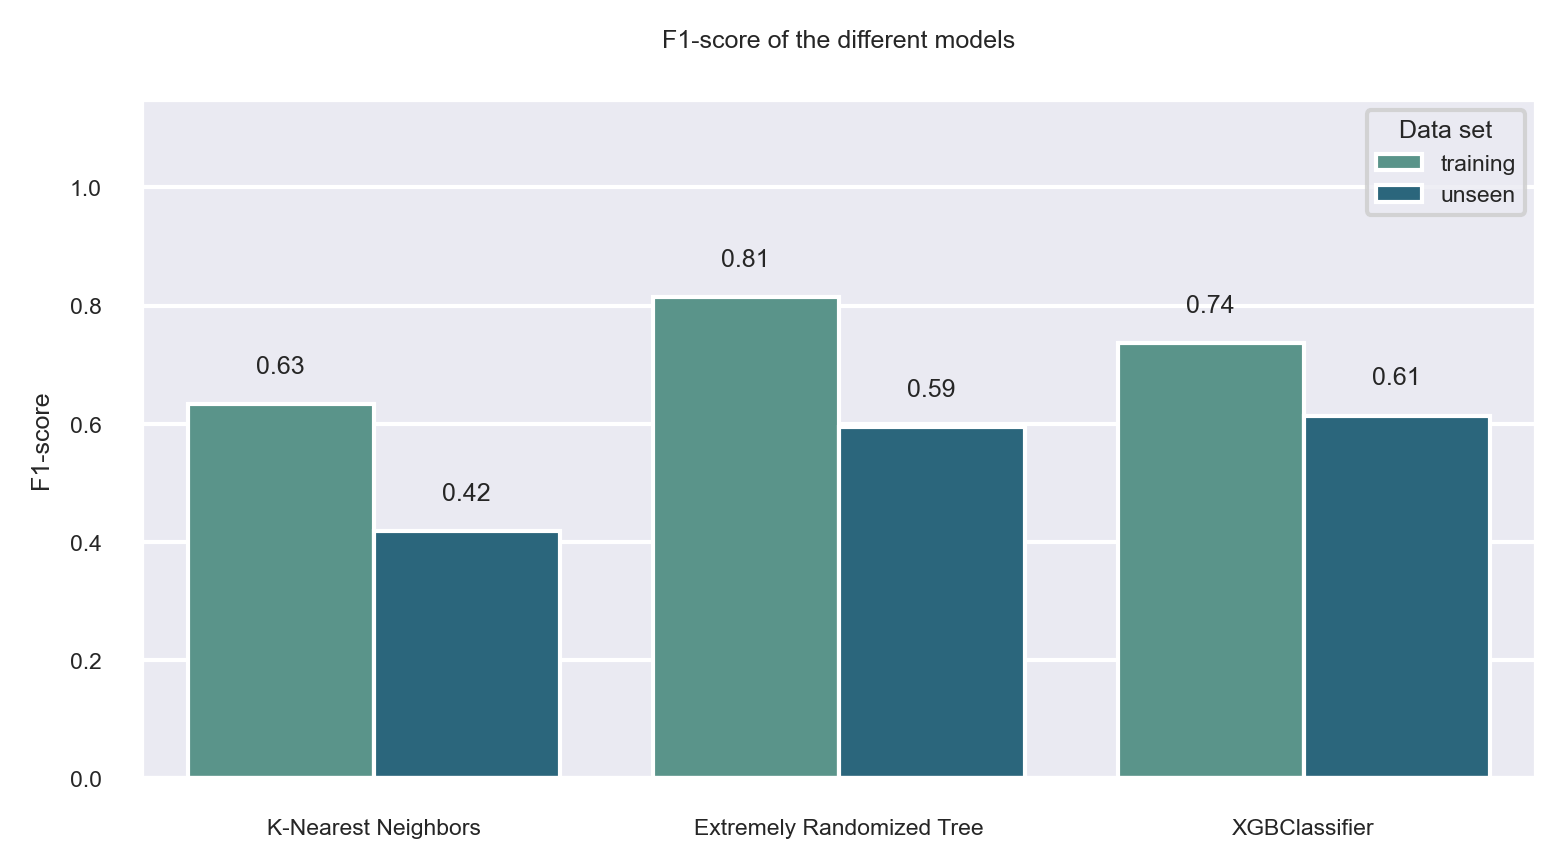

In [19]:
# create a color map for the two data types
cmap = sns.color_palette("crest", 2)
ax = sns.barplot(data=model_f1, x="model", y="f1_score", hue="data_typ", palette=cmap)

# do the annotation on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# set chart labels
ax.set_title('F1-score of the different models\n')
ax.set_xlabel('')
ax.set_ylabel('F1-score')

# set the ticket labels
plt.legend(title='Data set')
plt.yticks(rotation=0) 
plt.ylim(0, 1.15)
plt.xticks(rotation=0, horizontalalignment='center')

# display the bar chart of the label accuracies
plt.show()